![diffusers_library](https://github.com/huggingface/diffusers/raw/main/docs/source/en/imgs/diffusers_library.jpg)

*Introducing Hugging Face's new library for diffusion models*

介绍 Hugging Face 的新扩散模型库

Diffusion models proved themselves very effective in artificial synthesis, even beating GANs for images. Because of that, they gained traction in the machine learning community and play an important role for systems like [DALL-E 2](https://openai.com/dall-e-2/) or [Imagen](https://imagen.research.google/) to generate photorealistic images when prompted on text.

事实证明，扩散模型在人工合成方面非常有效，甚至在图像方面击败了 GAN。 正因为如此，它们在机器学习社区中获得了关注，并在 DALL-E 2 或 Imagen 等系统在出现文本提示时生成逼真图像方面发挥了重要作用。

While the most prolific successes of diffusion models have been in the computer vision community, these models have also achieved remarkable results in other domains, such as:

虽然扩散模型最成功的领域是计算机视觉领域，但这些模型在其他领域也取得了显着的成果，例如：

- [video generation](https://video-diffusion.github.io/),

  视频生成，

- [audio synthesis](https://diffwave-demo.github.io/),

  音频合成，

- [reinforcement learning](https://diffusion-planning.github.io/),

  强化学习，

- and more.

However, most of the recent research on diffusion models, *e.g.* DALL-E 2 and Imagen, is unfortunately not accessible to the broader machine learning community and typically remains behind closed doors.

然而，最近大多数关于扩散模型的研究，例如 不幸的是，DALL-E 2 和 Imagen 无法被更广泛的机器学习社区访问，并且通常处于闭门状态。

Here comes the `diffusers` library with the goals to:

这是扩散器库，其目标是：

1. gather recent diffusion models from independent repositories in a single and **long-term maintained** project that is built by and for the **community**,

  从独立存储库收集最新的扩散模型，将其纳入由社区构建并为社区构建的单一且长期维护的项目中，

2. reproduce high impact machine learning systems such as DALLE and Imagen in a manner that is accessible for the public, and

  以公众可以访问的方式重现 DALLE 和 Imagen 等高影响力的机器学习系统，以及

3. create an easy to use API that enables one to train their own models or re-use checkpoints from other repositories for inference.

  创建一个易于使用的 API，使人们能够训练自己的模型或重复使用其他存储库中的检查点进行推理。

This notebook will walk you through the most important features of `diffusers`.

本笔记本将引导您了解扩散器最重要的功能。

We assume that the reader has a minimal understanding of how diffusion models function. To refresh some theory as well as terminology, we recommend reading/skimming the following blog posts:

我们假设读者对扩散模型的运作原理有最低限度的了解。 要刷新一些理论和术语，我们建议阅读/浏览以下博客文章：

  - Lilian Weng's, OpenAI, [introductory post](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/)

    Lilian Weng 的 OpenAI，介绍性帖子

  - Yang Song's, Stanford, [introductory post](https://yang-song.github.io/blog/2021/score/)

    杨松，斯坦福大学，介绍性帖子

  - The Annotated Diffusion Model [post](https://huggingface.co/blog/annotated-diffusion)

    带注释的扩散模型帖子

Or papers:

或者论文：

- The original paper proposing [thermodynamics for unsupervised learning](https://arxiv.org/abs/1503.03585),

  提出将热力学用于无监督学习的原始论文，

- The paper for a popular diffusion model, [Denoising Diffusion Probabilistic Models DDPM](https://arxiv.org/abs/2006.11239), or

  流行扩散模型的论文，去噪扩散概率模型 DDPM，或

- A recent paper covering [tradeoffs in diffusion models](https://arxiv.org/abs/2206.00364)

  最近一篇论文涉及扩散模型的权衡
  

### Summary

概括

This post is designed to showcase the core API of `diffusers`, which is divided into three components:

这篇文章旨在展示扩散器的核心 API，它分为三个组件：

1. **Pipelines**: high-level classes designed to rapidly generate samples from popular trained diffusion models in a user-friendly fashion.

  管道：高级课程，旨在以用户友好的方式从流行的训练扩散模型快速生成样本。

2. **Models**: popular architectures for training new diffusion models, *e.g.* [UNet](https://arxiv.org/abs/1505.04597).

  模型：用于训练新扩散模型的流行架构，例如 联合国网。

3. **Schedulers**: various techniques for generating images from noise during *inference* as well as to generate noisy images for *training*.

  调度程序：在推理过程中从噪声生成图像以及生成用于训练的噪声图像的各种技术。

**Note**: This notebook focus only on **inference**. If you want to get a more hands-on guide on **training** diffusion models, please have a look at the [*Training with Diffusers*](https://colab.research.google.com/gist/anton-l/f3a8206dae4125b93f05b1f5f703191d/diffusers_training_example.ipynb) notebook.
注意：本笔记本仅关注推理。 如果您想获得有关训练扩散模型的更多实践指南，请查看“Training with Diffusers”笔记本。


### Install `diffusers`

In [1]:
!pip install diffusers==0.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 8.7 MB/s eta 0:00:00


### Overview

One goal of the diffusers library is to make diffusion models accessible to a wide range of deep learning practitioners.
With this in mind, we aimed at building a library that is **easy to use**, **intuitive to understand**, and **easy to contribute to**.

扩散器库的目标之一是使扩散模型可供广泛的深度学习从业者使用。 考虑到这一点，我们的目标是构建一个易于使用、直观理解且易于贡献的库。

As a quick recap, diffusion models are machine learning systems that are trained to *denoise* random gaussian noise step by step, to get to a sample of interest, such as an *image*.

快速回顾一下，扩散模型是机器学习系统，经过训练可以逐步对随机高斯噪声进行去噪，以获得感兴趣的样本，例如图像。

The underlying model, often a neural network, is trained to predict a way to slightly denoise the image in each step. After certain number of steps, a sample is obtained.

底层模型（通常是神经网络）经过训练，可以预测在每个步骤中对图像进行轻微去噪的方法。 经过一定数量的步骤后，获得样本。

The process is illustrated by the following design:

该过程通过以下设计来说明：

![](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusion-process.png)


The architecture of the neural network, referred to as **model**, commonly follows the UNet architecture as proposed in [this paper](https://arxiv.org/abs/1505.04597) and improved upon in the Pixel++ paper.

神经网络的架构（称为模型）通常遵循本文提出的 UNet 架构，并在 Pixel++ 论文中进行了改进。

![](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/unet-model.png)

No worries if you don't understand everything. Some of the highlights of the architecture are:

如果您不理解所有内容，也不必担心。 该架构的一些亮点是：

* this model predicts images of the same size as the input

  该模型预测与输入大小相同的图像

* the model makes the input image go through several blocks of ResNet layers which halves the image size by 2

  该模型使输入图像经过几个 ResNet 层块，将图像大小减半 2

* then through the same number of blocks that upsample it again.

  然后通过相同数量的块再次对其进行上采样。

* skip connections link features on the downsample path to corresponding layers in the upsample path.

  跳过连接将下采样路径上的特征链接到上采样路径中的相应层。


The diffusion process consists in taking random noise of the size of the desired output and pass it through the model several times. The process ends after a given number of steps, and the output image should represent a sample according to the training data distribution of the model, for instance an image of a butterfly.

扩散过程包括获取所需输出大小的随机噪声并将其多次通过模型。 该过程在给定数量的步骤后结束，输出图像应代表根据模型的训练数据分布的样本，例如蝴蝶的图像。

During training we show many samples of a given distribution, such as images of butterfly. After training, the model will be able to process random noise to generate similar butterfly images.

在训练过程中，我们展示了给定分布的许多样本，例如蝴蝶的图像。 训练后，模型将能够处理随机噪声以生成类似的蝴蝶图像。

Without going in too much detail, the model is usually not trained to directly predict a slightly less noisy image, but rather to predict the "noise residual" which is the difference between a less noisy image and the input image (for a diffusion model called "DDPM") or, similarly, the gradient between the two time steps (like the diffusion model called "Score VE").

在不涉及太多细节的情况下，模型通常不会被训练来直接预测噪声稍小的图像，而是预测“噪声残差”，即噪声较小的图像和输入图像之间的差异（对于称为扩散模型） “DDPM”），或者类似地，两个时间步之间的梯度（如称为“Score VE”的扩散模型）。

To do the denoising process, a specific noise scheduling algorithm is thus necessary and "wrap" the model to define how many diffusion steps are needed for inference as well as how to *compute* a less noisy image from the model's output. Here is where the different **schedulers** of the diffusers library come into play.

为了进行去噪过程，需要特定的噪声调度算法，并“包装”模型来定义推理需要多少扩散步骤，以及如何从模型的输出计算噪声较小的图像。 这就是扩散器库的不同调度程序发挥作用的地方。

Finally, a **pipeline** groups together a **model** and a **scheduler** and make it easy for an end-user to run a full denoising loop process. We'll start with the pipelines and dive deeper into its implementation before taking a closer look at models and schedulers.

最后，管道将模型和调度程序组合在一起，使最终用户可以轻松运行完整的去噪循环过程。 我们将从管道开始，深入研究其实现，然后再仔细研究模型和调度程序。


## Core API

### Pipelines

Let's begin by importing a pipeline. We'll use the `google/ddpm-celebahq-256` model, built in collaboration by Google and U.C.Berkeley. It's a model following the [Denoising Diffusion Probabilistic Models (DDPM) algorithm](https://arxiv.org/abs/2006.11239) trained on a dataset of celebrities images.

让我们从导入管道开始。 我们将使用 google/ddpm-celebahq-256 模型，该模型由 Google 和加州大学伯克利分校合作构建。 该模型遵循在名人图像数据集上训练的去噪扩散概率模型 (DDPM) 算法。

We can import the `DDPMPipeline`, which will allow you to do inference with a couple of lines of code:

我们可以导入 DDPMPipeline，这将允许您使用几行代码进行推理：


In [2]:
from diffusers import DDPMPipeline

The `from_pretrained()` method allows downloading the model and its configuration from [the Hugging Face Hub](https://huggingface.co/google/ddpm-celebahq-256), a repository of over 60,000 models shared by the community.


In [4]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.3 MB/s eta 0:00:00


In [6]:
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image_pipe.to("cuda")

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


To generate an image, we simply run the pipeline and don't even need to give it any input, it will generate a random initial noise sample and then iterate the diffusion process.

为了生成图像，我们只需运行管道，甚至不需要给它任何输入，它会生成随机的初始噪声样本，然后迭代扩散过程。

The pipeline returns as output a dictionary with a generated `sample` of interest. This will typically take 2-3 minutes on Google Colab:

管道返回包含生成的感兴趣样本的字典作为输出。 在 Google Colab 上，这通常需要 2-3 分钟：


In [ ]:
images = image_pipe().images

  0%|          | 0/1000 [00:00<?, ?it/s]

Let's take a look 🙂

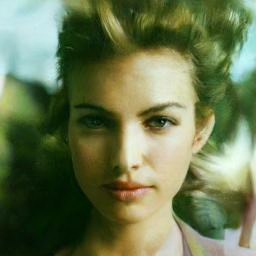

In [ ]:
images[0]

Looks pretty good!

看起来不错！

Now, let's try to understand a bit better what was going on under the hood. Let's see what the pipeline is made of:

现在，让我们尝试更好地了解幕后发生的事情。 让我们看看管道是由什么组成的：


In [ ]:
image_pipe

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.3.0",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

We can see inside the pipeline a scheduler and a UNet model. Let's have a closer look at them and what this pipeline just did behind the scenes.

我们可以在管道内部看到一个调度程序和一个 UNet 模型。 让我们仔细看看它们以及这条管道在幕后做了什么。

### Models

Instances of the model class are neural networks that take a noisy `sample` as well as a `timestep` as inputs to predict a less noisy output `sample`. Let's load a pre-trained model and play around with it to understand the model API!

模型类的实例是神经网络，它采用噪声样本和时间步长作为输入来预测噪声较小的输出样本。 让我们加载一个预先训练的模型并使用它来了解模型 API！

We'll load a simple unconditional image generation model of type `UNet2DModel` which was released with the [DDPM Paper](https://arxiv.org/abs/2006.11239) and for instance take a look at another checkpoint trained on church images: [`google/ddpm-church-256`](https://huggingface.co/google/ddpm-church-256).

我们将加载一个 UNet2DModel 类型的简单无条件图像生成模型，该模型与 DDPM 论文一起发布，例如看一下在教堂图像上训练的另一个检查点：google/ddpm-church-256。

Similarly to what we've seen for the pipeline class, we can load the model configuration and weights with one line, using the `from_pretrained()` method that you may be familiar with if you've played with the `transformers` library:

与我们在管道类中看到的类似，我们可以使用 from_pretrained() 方法用一行加载模型配置和权重，如果您使用过 Transformers 库，您可能会熟悉该方法：


In [ ]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-church-256"
model = UNet2DModel.from_pretrained(repo_id)

Downloading:   0%|          | 0.00/790 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455M [00:00<?, ?B/s]

The `from_pretrained()` method caches the model weights locally, so if you execute the cell above a second time, it will go much faster. The model is a pure PyTorch `torch.nn.Module` class which you can see when printing out `model`.

from_pretrained() 方法在本地缓存模型权重，因此如果您第二次执行上面的单元，速度会快得多。 该模型是一个纯 PyTorch torch.nn.Module 类，您可以在打印模型时看到它。


In [ ]:
model

UNet2DModel(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0): ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
        (1): ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (c

Now let's take a look at the model's configuration. The configuration can be accessed via the `config` attribute and shows all the necessary parameters to define the model architecture (and only those).

现在我们来看看该车型的配置。 配置可以通过 config 属性访问，并显示定义模型架构的所有必要参数（并且仅显示这些参数）。

In [ ]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('act_fn', 'silu'),
            ('attention_head_dim', None),
            ('norm_num_groups', 32),
            ('norm_eps', 

As you can see, the model config is a frozen dictionary. This is to enforce that the configuration will **only** be used to define the model architecture at instantiation time and not for any attributes that can be changed during inference.

正如您所看到的，模型配置是一个冻结的字典。 这是为了强制配置仅用于在实例化时定义模型架构，而不用于在推理期间可以更改的任何属性。

A couple of important config parameters are:

几个重要的配置参数是：

- `sample_size`: defines the `height` and `width` dimension of the input sample.

  Sample_size：定义输入样本的高度和宽度尺寸。

- `in_channels`: defines the number of input channels of the input sample.

  in_channels：定义输入样本的输入通道数。

- `down_block_types` and `up_block_types`: define the type of down- and upsampling blocks that are used to create the UNet architecture as was seen in the figure at the beginning of this notebook.

  down_block_types 和 up_block_types：定义用于创建 UNet 架构的下采样和上采样块的类型，如本笔记本开头的图中所示。

- `block_out_channels`: defines the number of output channels of the downsampling blocks, also used in reversed order for the number of input channels of the upsampling blocks.

  block_out_channels：定义下采样块的输出通道数，也以与上采样块的输入通道数相反的顺序使用。

- `layers_per_block`: defines how many ResNet blocks are present in each UNet block.

  layers_per_block：定义每个 UNet 块中存在多少个 ResNet 块。

Knowing how a UNet config looks like, you can quickly try to instantiate the exact same model architecture with random weights. To do so, let's pass the config as an unpacked dict to the `UNet2DModel` class.

了解 UNet 配置的样子后，您可以快速尝试使用随机权重实例化完全相同的模型架构。 为此，我们将配置作为解压的字典传递给 UNet2DModel 类。


In [ ]:
model_random = UNet2DModel(**model.config)

Cool, the above created a randomly initialized model with the same config as the previous one.

If you want to save the model you just created, you can use the `save_pretrained()` method, which saves both the model weights as well as the model config in the provided folder.

In [ ]:
model_random.save_pretrained("my_model")

Let's take a look at what files were saved in `my_model`.

In [ ]:
!ls my_model

config.json  diffusion_pytorch_model.bin


`diffusion_pytorch_model.bin` is a binary PyTorch file that stores the model weights and `config.json` stores the model's configuration.

If you want to reuse the model, you can simply use the `from_pretrained()` method again, as it loads local checkpoints as well as those present on the Hub.

In [ ]:
model_random = UNet2DModel.from_pretrained("my_model")

Coming back to the actually trained model, let's now see how you can use the model for inference. First, you need a random gaussian sample in the shape of an image (`batch_size` $\times$ `in_channels` $\times$ `sample_size` $\times$ `sample_size`). We have a `batch` axis because a model can receive multiple random noises, a `channel` axis because each one consists of multiple channels (such as red-green-blue), and finally `sample_size` corresponds to the height and width.

回到实际训练的模型，现在让我们看看如何使用该模型进行推理。 首先，您需要一个图像形状的随机高斯样本（batch_size × in_channels ×sample_size ×sample_size）。 我们有一个批处理轴，因为模型可以接收多个随机噪声，有一个通道轴，因为每个通道都由多个通道组成（例如红绿蓝），最后sample_size对应于高度和宽度。

In [ ]:
import torch

torch.manual_seed(0)

noisy_sample = torch.randn(
    1, model.config.in_channels, model.config.sample_size, model.config.sample_size
)
noisy_sample.shape

torch.Size([1, 3, 256, 256])

Time to do the inference!

是时候进行推理了！

You can pass the noisy sample alongside a `timestep` through the model. The timestep is important to cue the model with "how noisy" the input image is (more noisy in the beginning of the process, less noisy at the end), so the model knows if it's closer to the start or the end of the diffusion process.

您可以将噪声样本与时间步一起传递到模型中。 时间步对于提示模型输入图像的“噪声程度”非常重要（过程开始时噪声较大，结束时噪声较小），因此模型知道它是否更接近扩散的开始或结束 过程。

As explained in the introduction, the model predicts either the slightly less noisy image, the difference between the slightly less noisy image and the input image or even something else. It is important to carefully read through the [model card](https://huggingface.co/google/ddpm-church-256) to know what the model has been trained on. In this case, the model predicts the noise residual (difference between the slightly less noisy image and the input image).

正如简介中所解释的，该模型可以预测噪声稍低的图像、噪声稍低的图像与输入图像之间的差异，甚至预测其他内容。 仔细阅读模型卡以了解模型的训练内容非常重要。 在这种情况下，模型预测噪声残差（噪声稍小的图像与输入图像之间的差异）。


In [ ]:
with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample

The predicted `noisy_residual` has the exact same shape as the input and we use it to compute a slightly less noised image. Let's confirm the output shapes match:

In [ ]:
noisy_residual.shape

torch.Size([1, 3, 256, 256])

Great.

Now to summarize, **models**, such as `UNet2DModel` (PyTorch modules) are parameterized neural networks trained to *predict* a slightly less noisy image or residual. They are defined by their `.config` and can be loaded from the Hub as well as saved and loaded locally. The next step is learning how to combine this **model** with the correct **scheduler** to be able to actually generate images.

现在总结一下，UNet2DModel（PyTorch 模块）等模型是经过训练的参数化神经网络，用于预测噪声稍低的图像或残差。 它们由其 .config 定义，可以从集线器加载，也可以在本地保存和加载。 下一步是学习如何将该模型与正确的调度程序结合起来，以便能够实际生成图像。


### Schedulers

调度程序

**Schedulers** are algorithms wrapped into a Python class. They define the noise schedule which is used to add noise to the model during training, and also define the algorithm to *compute* the slightly less noisy sample given the model output (here `noisy_residual`). This notebook focuses only on how to use *scheduler* classes for inference. You can check out this notebook to see how to use *schedulers* for training.

调度程序是封装在 Python 类中的算法。 他们定义了噪声计划，用于在训练期间向模型添加噪声，并且还定义了计算给定模型输出（此处为noisy_residual）的噪声稍小的样本的算法。 本笔记本仅重点介绍如何使用调度程序类进行推理。 您可以查看此笔记本，了解如何使用调度程序进行训练。

It is important to stress here that while *models* have trainable weights, *schedulers* are usually *parameter-free* (in the sense they have no trainable weights) and simply define the algorithm to compute the slightly less noisy sample. Schedulers thus don't inherit from `torch.nn.Module`, but like models they are instantiated by a configuration.

这里需要强调的是，虽然模型具有可训练的权重，但调度程序通常是无参数的（从某种意义上说，它们没有可训练的权重），并且只需定义算法来计算噪声稍小的样本。 因此，调度程序不会继承自 torch.nn.Module，但像模型一样，它们由配置实例化。

To download a scheduler config from the Hub, you can make use of the `from_config()` method to load a configuration and instantiate a scheduler.

要从集线器下载调度程序配置，您可以使用 from_config() 方法加载配置并实例化调度程序。

Let's use `DDPMScheduler`, the denoising algorithm proposed in the [DDPM Paper](https://arxiv.org/abs/2006.11239).

让我们使用 DDPMScheduler，DDPM 论文中提出的去噪算法。


In [ ]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_config(repo_id)

Downloading:   0%|          | 0.00/256 [00:00<?, ?B/s]

Let's also take a look at the config here.

In [ ]:
scheduler.config

FrozenDict([('num_train_timesteps', 1000),
            ('beta_start', 0.0001),
            ('beta_end', 0.02),
            ('beta_schedule', 'linear'),
            ('trained_betas', None),
            ('variance_type', 'fixed_small'),
            ('clip_sample', True),
            ('_class_name', 'DDPMScheduler'),
            ('_diffusers_version', '0.3.0')])

Different schedulers are usually defined by different parameters. To better understand what the parameters are used for exactly, the reader is advised to directly look into the respective scheduler files under `src/diffusers/schedulers/`, such as the [`src/diffusers/schedulers/scheduling_ddpm.py`](https://github.com/huggingface/diffusers/blob/main/src/diffusers/schedulers/scheduling_ddpm.py) file. Here are the most important ones:

不同的调度器通常由不同的参数定义。 为了更好地理解这些参数的确切用途，建议读者直接查看 src/diffusers/schedulers/ 下的相应调度程序文件，例如 src/diffusers/schedulers/scheduling_ddpm.py 文件。 以下是最重要的：

- `num_train_timesteps` defines the length of the denoising process, e.g. how many timesteps are need to process random gaussian noise to a data sample.

  num_train_timesteps 定义去噪过程的长度，例如 需要多少个时间步来处理数据样本的随机高斯噪声。

- `beta_schedule` define the type of noise schedule that shall be used for inference and training

  beta_schedule 定义用于推理和训练的噪声调度类型

- `beta_start` and `beta_end` define the smallest noise value and highest noise value of the schedule.

  beta_start 和 beta_end 定义了调度的最小噪声值和最高噪声值。

Like the *models*, *schedulers* can be saved and loaded with `save_config()` and `from_config()`.

与模型一样，调度程序可以使用 save_config() 和 from_config() 保存和加载。


In [ ]:
scheduler.save_config("my_scheduler")
new_scheduler = DDPMScheduler.from_config("my_scheduler")

All schedulers provide one or multiple `step()` methods that can be used to compute the slightly less noisy image. The `step()` method may vary from one scheduler to another, but normally expects at least the model output, the `timestep` and the current `noisy_sample`.

所有调度程序都提供一个或多个step()方法，可用于计算噪声稍小的图像。 step() 方法可能因调度程序而异，但通常至少需要模型输出、时间步长和当前的noisy_sample。

Note that the `step()` method is somewhat of a black box function that "just works". If you are keen to better understand how exactly the previous noisy sample is computed as defined in the original paper of the scheduler, you should take a look at the actual code, *e.g.* [click here](https://github.com/huggingface/diffusers/blob/936cd08488260a9df3548d66628b83bc7f26bd9e/src/diffusers/schedulers/scheduling_ddpm.py#L130) for DDPM, which contains comments and references to the original paper.

请注意，step() 方法有点像“正常工作”的黑盒函数。 如果您渴望更好地了解如何按照调度程序原始论文中的定义准确地计算先前的噪声样本，您应该查看实际的代码，例如 单击此处查看 DDPM，其中包含对原始论文的评论和参考。

Let's give it a try using the model output from the previous section.

让我们使用上一节的模型输出来尝试一下。


In [ ]:
less_noisy_sample = scheduler.step(
    model_output=noisy_residual, timestep=2, sample=noisy_sample
).prev_sample
less_noisy_sample.shape

torch.Size([1, 3, 256, 256])

You can see that the computed sample has the exact same shape as the model input, meaning that you are ready to pass it to the model again in a next step.

您可以看到计算出的样本具有与模型输入完全相同的形状，这意味着您已准备好在下一步中再次将其传递给模型。

Let's now bring it all together and actually define the denoising loop. This loop prints out the (less and less) noisy samples along the way for better visualization in the denoising loop. Let's define a display function that takes care of post-processing the denoised image, convert it to a `PIL.Image` and displays it.

现在让我们将它们放在一起并实际定义降噪循环。 该循环一路打印出（越来越少）噪声样本，以便在降噪循环中更好地可视化。 让我们定义一个显示函数，负责对去噪图像进行后处理，将其转换为 PIL.Image 并显示它。


In [ ]:
import PIL.Image
import numpy as np


def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

Before defining the loop, let's move the input and model to the GPU to speed up the denoising process a bit.

In [ ]:
model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

Time to finally define the denoising loop! It is rather straight-forward for DDPM.

1. Predict the residual of the less noisy sample with the model.
2. Compute the less noisy sample with the scheduler.

Additionally, at every 50th step this will display the progress.

It's important to note here that you loop over `scheduler.timesteps` which is a tensor defining the sequence of timesteps over which to iterate during the denoising process. Usually, the denoising process goes in decreasing order of timesteps, so from the total number of timesteps (here 1000) to 0.

Depending on your GPU this might take up to a minute - enough time to reflect on everything you learned so far while you can watch a church being built from nothing but noise ⛪.

  5%|▍         | 49/1000 [00:02<00:44, 21.60it/s]

'Image at step 50'

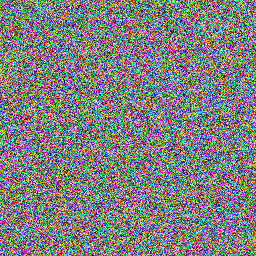

 10%|▉         | 97/1000 [00:04<00:42, 21.32it/s]

'Image at step 100'

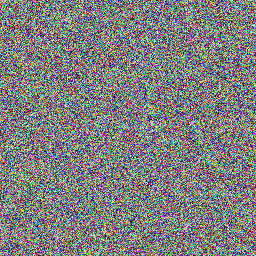

 15%|█▍        | 148/1000 [00:07<00:39, 21.46it/s]

'Image at step 150'

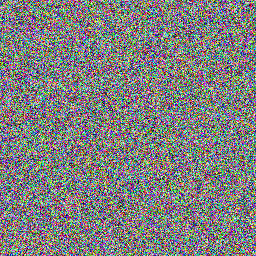

 20%|█▉        | 199/1000 [00:09<00:37, 21.29it/s]

'Image at step 200'

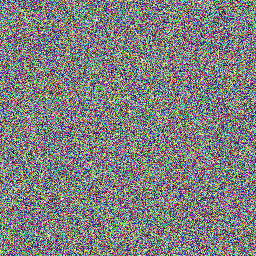

 25%|██▍       | 247/1000 [00:11<00:35, 21.34it/s]

'Image at step 250'

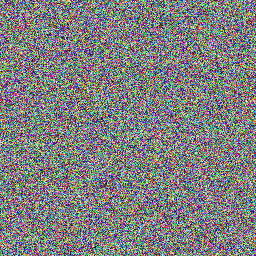

 30%|██▉       | 298/1000 [00:14<00:33, 21.03it/s]

'Image at step 300'

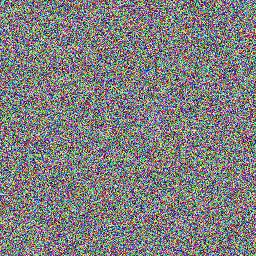

 35%|███▍      | 348/1000 [00:16<00:31, 20.96it/s]

'Image at step 350'

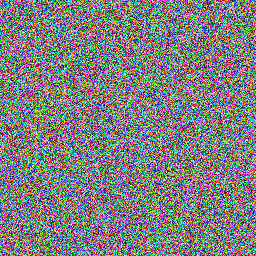

 40%|███▉      | 398/1000 [00:19<00:29, 20.74it/s]

'Image at step 400'

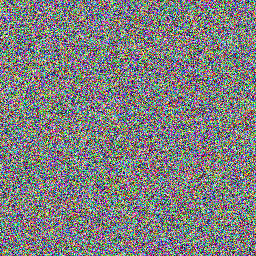

 45%|████▍     | 448/1000 [00:21<00:26, 20.47it/s]

'Image at step 450'

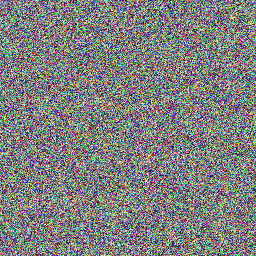

 50%|████▉     | 499/1000 [00:24<00:23, 21.30it/s]

'Image at step 500'

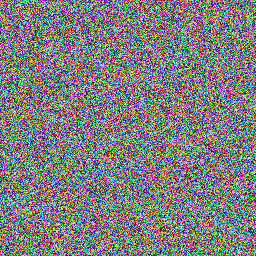

 55%|█████▍    | 548/1000 [00:26<00:21, 20.82it/s]

'Image at step 550'

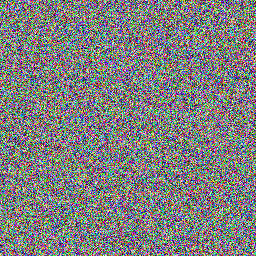

 60%|█████▉    | 598/1000 [00:28<00:19, 21.10it/s]

'Image at step 600'

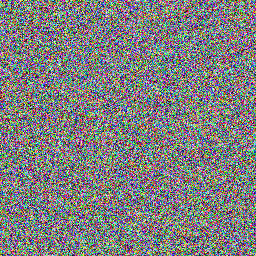

 65%|██████▍   | 649/1000 [00:31<00:16, 20.84it/s]

'Image at step 650'

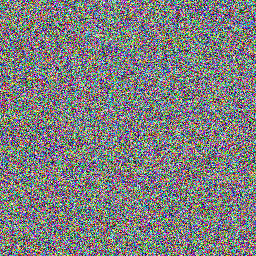

 70%|██████▉   | 699/1000 [00:33<00:14, 20.95it/s]

'Image at step 700'

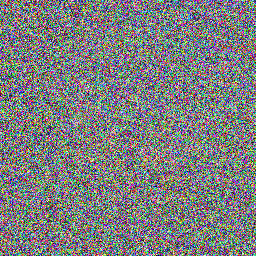

 75%|███████▍  | 749/1000 [00:36<00:12, 20.74it/s]

'Image at step 750'

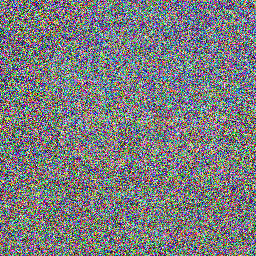

 80%|███████▉  | 798/1000 [00:38<00:09, 20.69it/s]

'Image at step 800'

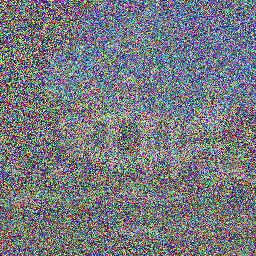

 85%|████████▍ | 849/1000 [00:41<00:07, 20.60it/s]

'Image at step 850'

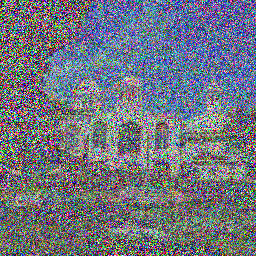

 90%|████████▉ | 899/1000 [00:43<00:04, 20.33it/s]

'Image at step 900'

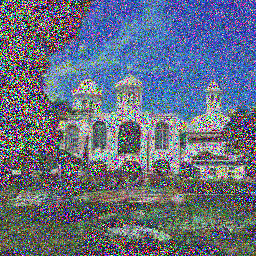

 95%|█████████▍| 947/1000 [00:46<00:02, 20.61it/s]

'Image at step 950'

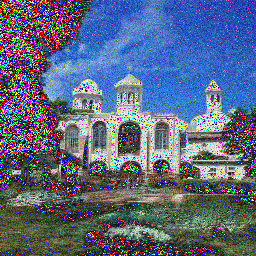

100%|█████████▉| 998/1000 [00:48<00:00, 20.28it/s]

'Image at step 1000'

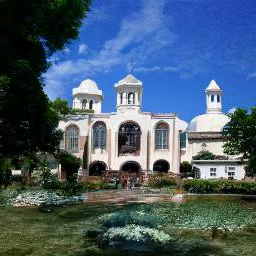

100%|██████████| 1000/1000 [00:49<00:00, 20.37it/s]


In [ ]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 50 == 0:
        display_sample(sample, i + 1)

You can see that it takes quite some time to see a somewhat meaningful shape - only after *ca.* 800 steps.

While the quality of the image is actually quite good - you might want to speed up the image generation.

To do so, you can try replacing the DDPM scheduler with the [DDIM](https://arxiv.org/abs/2010.02502) scheduler which keep high generation quality at significantly sped-up generation time.

**Exchanging schedulers**: one of the exciting prospects of a diffusion model library is that different scheduling protocols can work with different models, but there is not a one-sized fits all solution!
In this case, DDIM worked as an swap for DDPM, but this not universal (and represents an interesting research problem).



The DDPM and DDIM scheduler more or less share the same configuration, so you can load a DDIM scheduler from a DDPM scheduler.

In [ ]:
from diffusers import DDIMScheduler

scheduler = DDIMScheduler.from_config(repo_id)

{'timestep_values', 'set_alpha_to_one'} was not found in config. Values will be initialized to default values.


The DDIM scheduler allows the user to define how many denoising steps should be run at inference via the `set_timesteps` method. The DDPM scheduler runs by default 1000 denoising steps. Let's significantly reduce this number to just 50 inference steps for DDIM.

In [ ]:
scheduler.set_timesteps(num_inference_steps=50)

And you can run the same loop as before - only that you are now making use of the much faster DDIM scheduler.

 18%|█▊        | 9/50 [00:00<00:01, 22.58it/s]

'Image at step 10'

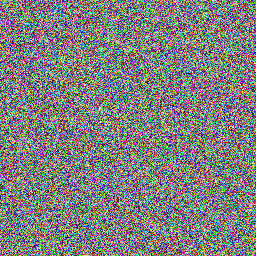

 36%|███▌      | 18/50 [00:00<00:01, 21.88it/s]

'Image at step 20'

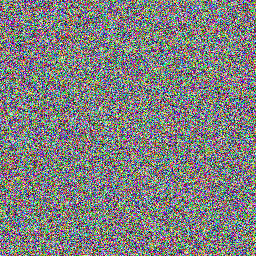

 54%|█████▍    | 27/50 [00:01<00:01, 21.42it/s]

'Image at step 30'

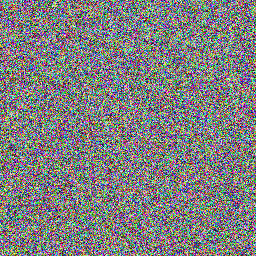

 78%|███████▊  | 39/50 [00:01<00:00, 21.43it/s]

'Image at step 40'

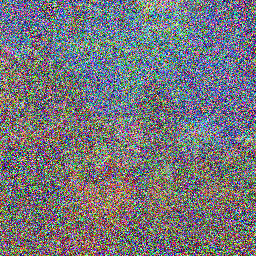

 96%|█████████▌| 48/50 [00:02<00:00, 20.97it/s]

'Image at step 50'

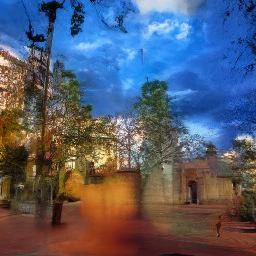

100%|██████████| 50/50 [00:02<00:00, 20.81it/s]


In [ ]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute previous image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 10 == 0:
        display_sample(sample, i + 1)

You can see that the image generation is indeed much faster - a mere two seconds - but also that you pay by giving away image quality in exchange for speed.

Cool, now you should have gotten a good first understanding of the schedulers. The important things to remember are:
1. schedulers are *parameter-free* (no trainable weights)
2. schedulers define the algorithm computing the slightly less noisy sample during inference

They are many schedulers already added to `diffusers` and diffusers will be adding even more in the future. It's important that you read the model cards to understand which model checkpoints can be used with which schedulers.
You can find all available schedulers [here](https://github.com/huggingface/diffusers/tree/main/src/diffusers/schedulers).

To end the chapter about **models** and **schedulers**, please also note that we very much *deliberately* try to keep *models* and *schedulers* as independent from each other as possible. This means a `scheduler` should never accept a `model` as an input and vice-versa. The model *predict* the noise residual or slightly less noisy image with its trained weights, while the scheduler *computes* the previous sample given the model's output.